In [ ]:
pyechomask example

In [2]:
## import packages
import os
import pickle    
import matplotlib.pyplot as plt
import glob
import gzip
import numpy as np

## import user modules
import pyechomask
from pyechomask.mask import Mask
from pyechomask.masks import binary_threshold
from pyechomask.readers import read_PERGobjs

## filenames of test data
data_filenames = glob.glob(os.path.dirname(pyechomask.__file__).rsplit('\\',1)[0]+'/data/*')

## create instance of mask class
mask_obj = Mask()

## add masks, defined by method and parameter values
params    = {'fq':18,'th':-70}
mask_ID1 = mask_obj.add_mask(binary_threshold,params)
params    = {'fq':38,'th':-70}
mask_ID2 = mask_obj.add_mask(binary_threshold,params)
params    = {'fq':70,'th':-70}
mask_ID3 = mask_obj.add_mask(binary_threshold,params)
params    = {'fq':120,'th':-70}
mask_ID4 = mask_obj.add_mask(binary_threshold,params)
params    = {'fq':200,'th':-70}
mask_ID5 = mask_obj.add_mask(binary_threshold,params)


## list mask definitions
mask_obj.list_masks()

binary masks:
	threshold:
		ID: 0, Parameter values: {'fq': 18, 'th': -70}
		ID: 1, Parameter values: {'fq': 38, 'th': -70}
		ID: 2, Parameter values: {'fq': 70, 'th': -70}
		ID: 3, Parameter values: {'fq': 120, 'th': -70}
		ID: 4, Parameter values: {'fq': 200, 'th': -70}
flag masks:
cont masks:


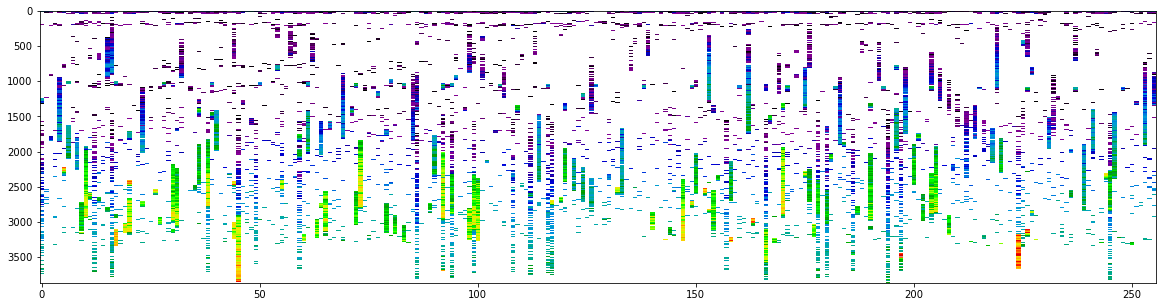

In [16]:
## EXAMPLE - build single mask
Sv_dict = mask_obj.build_mask(read_PERGobjs(data_filenames[0]),mask_ID5)
mask    = Sv_dict['mask']
Sv      = Sv_dict['Sv']
Sv      = np.ma.masked_where(Sv == -999,Sv)
Sv      = np.ma.masked_where(mask == 0,Sv)

## plot mask
plt.figure(figsize = (20,5))
plt.imshow(Sv,aspect='auto',cmap = plt.cm.spectral)
plt.show()

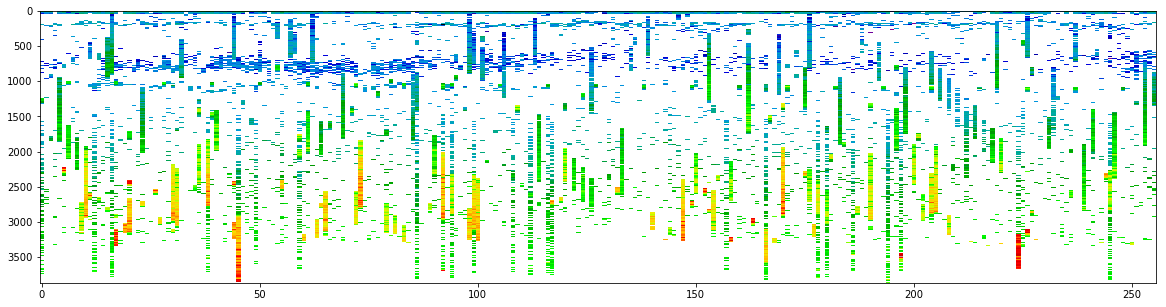

In [9]:
## EXAMPLE - build composite mask (presence/absence mask)
## e.g. This would be used to combine all noise masks into a single binary mask
masks       = [mask_ID3,mask_ID4,mask_ID5]
output_mask = mask_ID5
Sv_dict     = mask_obj.build_composite_mask(read_PERGobjs(data_filenames[0]),masks,output_mask)
mask    = Sv_dict['mask']
Sv      = Sv_dict['Sv']
Sv      = np.ma.masked_where(Sv == -999,Sv)
Sv      = np.ma.masked_where(mask == 0,Sv)

## plot mask
plt.figure(figsize = (20,5))
plt.imshow(Sv,aspect='auto',cmap = plt.cm.spectral) 
plt.show()

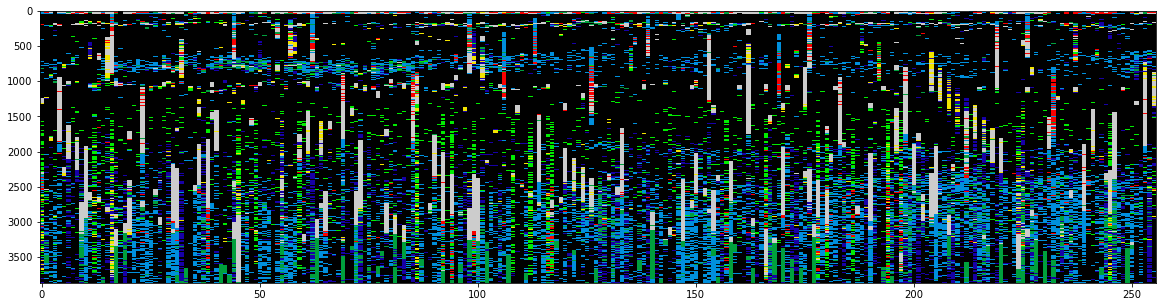

In [19]:
## EXAMPLE - build composite mask (composite binary mask)
Sv_dict = mask_obj.build_composite_mask(read_PERGobjs(data_filenames[0]),masks,output_mask,output = 'bitwise')
mask    = Sv_dict['mask']

## plot mask
plt.figure(figsize = (20,5))
plt.imshow(mask,aspect='auto',cmap = plt.cm.spectral) 
plt.show()

In [ ]:
In this example, the bitint_mask has 8 values (0,1,2,3,4,5,6,7). 
their binary representations are:

In [20]:
for i in np.unique(mask):
    print(i,bin(i)[2:].ljust(3,'0'))    

0 000
1 100
2 100
3 110
4 100
5 101
6 110
7 111


In [ ]:
By example, cells with the value of 6 (110) have values of 1 for the 
first two binary layers and a value of 0 for the last binary layer.
In this case, the Sv value is larger than -70 dB at 70 and 120 kHz but 
smaller than -70 dB at 200 kHz.